In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
run_id_number = 8

In [3]:
# Set whether running the below data cleaning steps on input (training) or prediction (test)
# 1 ---- training:   run_type = 1
# 2 ---- prediction: run_type = 2 (or anything other than 1)

run_type = 2

In [4]:
if run_type == 1:
    df = pd.read_csv('datasets/train.csv')
else:
    df = pd.read_csv('datasets/test.csv')

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
# df['saleprice'].isna().sum()

In [6]:
# df = df.dropna(subset=['saleprice'])
# df.shape

In [7]:
df.shape

(878, 80)

In [8]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [10]:
df.isnull().sum().sort_values(ascending=False).head(30)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_2     25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
kitchen_abvgr       0
totrms_abvgrd       0
bedroom_abvgr       0
half_bath           0
full_bath           0
bsmt_half_bath      0
bsmt_full_bath      0
gr_liv_area         0
kitchen_qual        0
id                  0
functional          0
dtype: int64

### Dropping Unneeded columns

In [11]:
# df.drop(columns=['id','pid'], inplace=True)
df.drop(columns=['pid'], inplace=True)
df.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [12]:
df.describe()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,878.000000,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [13]:
numeric_data_cols = ['lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']

### Converting ordinal data

In [14]:
#Fix Lot Shape col into ordinal data
# Reg	Regular	(3);        IR1	Slightly irregular (2);       IR2	Moderately Irregular (1);       IR3	Irregular (0)

lot_shape_key = {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0, np.nan:0}
df['lot_shape'] = df['lot_shape'].map(lot_shape_key)

df['lot_shape'].value_counts()

3    564
2    286
1     21
0      7
Name: lot_shape, dtype: int64

In [15]:
#Fix Utilities col into ordinal data
#        AllPub	All public Utilities (E,G,W,& S) (4)
#        NoSewr	Electricity, Gas, and Water (Septic Tank) (3)
#        NoSeWa	Electricity and Gas Only (2)
#        ELO	Electricity only	(1)

utils_key = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1, np.nan:0}
df['utilities'] = df['utilities'].map(utils_key)

df['utilities'].value_counts()

4    877
3      1
Name: utilities, dtype: int64

In [16]:
#Fix Land Slope col into ordinal data
# Gtl	Gentle slope (0);       Mod	Moderate Slope	(1);       Sev	Severe Slope (2)

land_slope_key = {'Sev':2, 'Mod':1, 'Gtl':0, np.nan:0}
df['land_slope'] = df['land_slope'].map(land_slope_key)

df['land_slope'].value_counts()

0    835
1     37
2      6
Name: land_slope, dtype: int64

In [17]:
#Fix Exter Qual col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);       Fa	Fair (2);       Po	Poor (1)

ext_qual_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}
df['exter_qual'] = df['exter_qual'].map(ext_qual_key)

df['exter_qual'].value_counts()

3    552
4    292
5     25
2      9
Name: exter_qual, dtype: int64

In [18]:
#Fix Exter Cond col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);       Fa	Fair (2);       Po	Poor (1)

ext_cond_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}
df['exter_cond'] = df['exter_cond'].map(ext_cond_key)

df['exter_cond'].value_counts()

3    770
4     84
2     18
5      5
1      1
Name: exter_cond, dtype: int64

In [19]:
#Fix Bsmt Qual col into ordinal data
# Ex	Excellent (100+ inches) (5);        Gd	Good (90-99 inches) (4);       TA	Typical (80-89 inches) (3);       
# Fa	Fair (70-79 inches) (2);       Po	Poor (<70 inches (1);    NA	No Basement (0)

bsmt_qual_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['bsmt_qual'] = df['bsmt_qual'].map(bsmt_qual_key)

df['bsmt_qual'].value_counts()

3    396
4    355
5     73
2     28
0     25
1      1
Name: bsmt_qual, dtype: int64

In [20]:
#Fix Bsmt Cond col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);   Fa	Fair (2);    Po	Poor (1);    NA	No Basement (0)

bsmt_cond_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['bsmt_cond'] = df['bsmt_cond'].map(bsmt_cond_key)

df['bsmt_cond'].value_counts()

3    781
2     39
4     33
0     25
Name: bsmt_cond, dtype: int64

In [21]:
#Fix Bsmt Exposure col into ordinal data
# Gd	Good (4);       Av	Average Exposure (3);   Mn	Mimimum Exposure (2);    No	No Exposure (1);    NA	No Basement (0)

bsmt_exposure_key = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0, np.nan:0}
df['bsmt_exposure'] = df['bsmt_exposure'].map(bsmt_exposure_key)

df['bsmt_exposure'].value_counts()

1    567
3    130
4     80
2     76
0     25
Name: bsmt_exposure, dtype: int64

In [22]:
#Fix BsmtFin Type 1 col into ordinal data
#  GLQ	Good Living Quarters (6);       ALQ	Average Living Quarters (5);       BLQ	Below Average Living Quarters (4);
#  Rec	Average Rec Room (3);   LwQ	Low Quality (2);    Unf	Unfinshed (1);       NA	No Basement (0)

bsmtfin_type_1_key = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0, np.nan:0}
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].map(bsmtfin_type_1_key)

df['bsmtfin_type_1'].value_counts()

1    248
6    243
5    136
3    105
4     69
2     52
0     25
Name: bsmtfin_type_1, dtype: int64

In [23]:
#Fix BsmtFin Type 2 col into ordinal data
#  GLQ	Good Living Quarters (6);       ALQ	Average Living Quarters (5);       BLQ	Below Average Living Quarters (4);
#  Rec	Average Rec Room (3);   LwQ	Low Quality (2);    Unf	Unfinshed (1);       NA	No Basement (0)

bsmtfin_type_2_key = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0, np.nan:0}
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].map(bsmtfin_type_2_key)

df['bsmtfin_type_2'].value_counts()

1    749
2     29
3     26
0     25
4     20
5     18
6     11
Name: bsmtfin_type_2, dtype: int64

In [24]:
#Fix Heating QC col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);   Fa	Fair (2);    Po	Poor (1)

heating_qc_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}
df['heating_qc'] = df['heating_qc'].map(heating_qc_key)

df['heating_qc'].value_counts()

5    429
3    267
4    157
2     25
Name: heating_qc, dtype: int64

In [25]:
#Fix Central Air col into 1/0
#        N	No (0);   Y	Yes (1)

central_air_key = {'Y':1, 'N':0, np.nan:0}
df['central_air'] = df['central_air'].map(central_air_key)

df['central_air'].value_counts()

1    823
0     55
Name: central_air, dtype: int64

In [26]:
#Fix Electrical col into ordinal data
# SBrkr	Standard Circuit Breakers & Romex (4); FuseA	Fuse Box over 60 AMP and all Romex wiring (Average) (3);
# FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair) (2); FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor) (1);
# Mix	Mixed (2) #!!!!

electrical_key = {'Ex':5, 'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':2, np.nan:1}   # DIFFERENT THAN TYPICAL!
df['electrical'] = df['electrical'].map(electrical_key)

df['electrical'].value_counts()

4    813
3     48
2     15
1      2
Name: electrical, dtype: int64

In [27]:
#Fix Kitchen Qual col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);   Fa	Fair (2);    Po	Poor (1)

kitchen_qual_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0}
df['kitchen_qual'] = df['kitchen_qual'].map(kitchen_qual_key)

df['kitchen_qual'].value_counts()

3    447
4    354
5     53
2     23
1      1
Name: kitchen_qual, dtype: int64

In [28]:
#Fix Functional col into ordinal data
# Typ	Typical Functionality (7); Min1	Minor Deductions 1 (6); Min2	Minor Deductions 2 (5); Mod	Moderate Deductions (4);
# Maj1	Major Deductions 1 (3); Maj2	Major Deductions 2 (2);  Sev	Severely Damaged (1); Sal	Salvage only (0);

functional_key = {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0, np.nan:0}
df['functional'] = df['functional'].map(functional_key)

df['functional'].value_counts()

7    812
5     28
6     23
3      7
4      6
2      2
Name: functional, dtype: int64

In [29]:
#Fix Fireplace Qu col into ordinal data
# Ex	Excellent - Exceptional Masonry Fireplace (5);        Gd	Good - Masonry Fireplace in main level (4);       
# TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement (3);   
# Fa	Fair - Prefabricated Fireplace in basement (2);    Po	Poor - Ben Franklin Stove (1); NA	No Fireplace (0)

fireplace_qu_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['fireplace_qu'] = df['fireplace_qu'].map(fireplace_qu_key)

df['fireplace_qu'].value_counts()

0    422
4    220
3    193
2     16
1     15
5     12
Name: fireplace_qu, dtype: int64

In [30]:
#Fix Garage Finish col into ordinal data
# Fin	Finished (3);   RFn	Rough Finished (2);    Unf	Unfinished (1); NA	No Garage (0)

garage_finish_key = {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0, np.nan:0}
df['garage_finish'] = df['garage_finish'].map(garage_finish_key)

df['garage_finish'].value_counts()

1    382
2    233
3    218
0     45
Name: garage_finish, dtype: int64

In [31]:
#Fix Garage Qual col into ordinal data
# Ex	Excellent (100+ inches) (5);        Gd	Good (90-99 inches) (4);       TA	Typical (80-89 inches) (3);       
# Fa	Fair (70-79 inches) (2);       Po	Poor (<70 inches (1);    NA	No Basement (0)

garage_qual_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['garage_qual'] = df['garage_qual'].map(garage_qual_key)

df['garage_qual'].value_counts()

3    782
0     45
2     42
4      6
1      3
Name: garage_qual, dtype: int64

In [32]:
#Fix Garage Cond col into ordinal data
# Ex	Excellent (5);        Gd	Good (4);       TA	Average/Typical (3);   Fa	Fair (2);    Po	Poor (1);    NA	No Basement (0)

garage_cond_key = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}
df['garage_cond'] = df['garage_cond'].map(garage_cond_key)

df['garage_cond'].value_counts()

3    796
0     45
2     27
1      6
4      3
5      1
Name: garage_cond, dtype: int64

In [33]:
#Fix Paved Drive col into ordinal data
#        Y	Paved (2);        P	Partial Pavement (1);        N	Dirt/Gravel (0)

paved_drive_key = {'Y':2, 'P':1,'N':0, np.nan:0}
df['paved_drive'] = df['paved_drive'].map(paved_drive_key)

df['paved_drive'].value_counts()

2    790
0     65
1     23
Name: paved_drive, dtype: int64

In [34]:
#Fix Pool Quality col into ordinal data

# Ex	Excellent (4);       Gd	Good (3);       TA	Average/Typical (2);       Fa	Fair (1);       NA	No Pool (0)

# df['pool_qc'].value_counts()
pool_qual_key = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0, np.nan:0}
df['pool_qc'] = df['pool_qc'].map(pool_qual_key)

df['pool_qc'].value_counts()

0    874
4      3
2      1
Name: pool_qc, dtype: int64

In [35]:
#Fix Fence col into ordinal data

# GdPrv	Good Privacy (4); MnPrv	Minimum Privacy (3); GdWo	Good Wood (2); MnWw	Minimum Wood/Wire (1); NA	No Fence (0)

fence_key = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.nan:0}
df['fence'] = df['fence'].map(fence_key)

df['fence'].value_counts()

0    706
3    103
4     35
2     32
1      2
Name: fence, dtype: int64

In [36]:
df.isna().sum().sort_values(ascending=False).head(10)

misc_feature     837
alley            820
lot_frontage     160
garage_yr_blt     45
garage_type       44
mas_vnr_type       1
mas_vnr_area       1
kitchen_abvgr      0
fireplace_qu       0
fireplaces         0
dtype: int64

In [37]:
df['alley'].value_counts()

Grvl    35
Pave    23
Name: alley, dtype: int64

In [38]:
df['bsmt_full_bath'].value_counts()

0    507
1    356
2     15
Name: bsmt_full_bath, dtype: int64

### Setting NaN's to 0 (or other) for columns where applicable

In [39]:
# df[df['bsmt_full_bath'].isna()]
# df.iloc[616]['bsmt_full_bath']

In [40]:
df.loc[df['lot_frontage'].isna(),'lot_frontage'] = 0
df.loc[df['mas_vnr_area'].isna(),'mas_vnr_area'] = 0

df.loc[df['bsmtfin_sf_1'].isna(),'bsmtfin_sf_1'] = 0
df.loc[df['bsmtfin_sf_2'].isna(),'bsmtfin_sf_2'] = 0
df.loc[df['bsmt_unf_sf'].isna(),'bsmt_unf_sf'] = 0
df.loc[df['total_bsmt_sf'].isna(),'total_bsmt_sf'] = 0
df.loc[df['bsmt_full_bath'].isna(),'bsmt_full_bath'] = 0
df.loc[df['bsmt_half_bath'].isna(),'bsmt_half_bath'] = 0
df.loc[df['full_bath'].isna(),'full_bath'] = 0         #0 count already anyways
df.loc[df['half_bath'].isna(),'half_bath'] = 0         #0 count already anyways
df.loc[df['bedroom_abvgr'].isna(),'bedroom_abvgr'] = 0 #0 count already anyways
df.loc[df['kitchen_abvgr'].isna(),'kitchen_abvgr'] = 0 #0 count already anyways
df.loc[df['totrms_abvgrd'].isna(),'totrms_abvgrd'] = 0 #0 count already anyways
df.loc[df['fireplaces'].isna(),'fireplaces'] = 0       #0 count already anyways
df.loc[df['garage_cars'].isna(),'garage_cars'] = 0
df.loc[df['garage_area'].isna(),'garage_area'] = 0

### Feature engineering - 

In [41]:
# df['tv_x_radio'] = df['TV'] * df['radio']
# df.head()

# FIX ME!!!!

# FIX ME!!!!

In [42]:
df['garage_yr_blt'].isna().sum()

45

In [43]:
#TBD how to handle NaN's
# 'garage_yr_blt',

# df.loc[df['garage_yr_blt'].isna(),'garage_yr_blt'] = 0
df.loc[df['garage_yr_blt']==2207,'garage_yr_blt'] = 2007   #correct an errant value to its assumed value
df.loc[df['garage_yr_blt'].isna(),'garage_yr_blt'] = round(df['garage_yr_blt'].mean())   #impute to mean value


# df.dropna(subset=['garage_yr_blt'])   # freaks out if contest dataset doesn't have right # of rows!

# FIX ME!!!!

# FIX ME!!!!

### EDA

In [44]:
if run_type == 1:
    df.boxplot(column='saleprice', by='overall_qual') ;

In [45]:
if run_type == 1:
    df.boxplot(column='saleprice', by='overall_cond') ;

In [46]:
if run_type == 1:
    plt.scatter(df.year_built, df.saleprice) ;
    plt.xlabel('year_built')
    plt.ylabel('saleprice') ;
    # plt.scatter(pd.DataFrame(Z_train).year_built, lasso_cv.predict(Z_train), s=5, alpha=.5) ;   #doesn't work

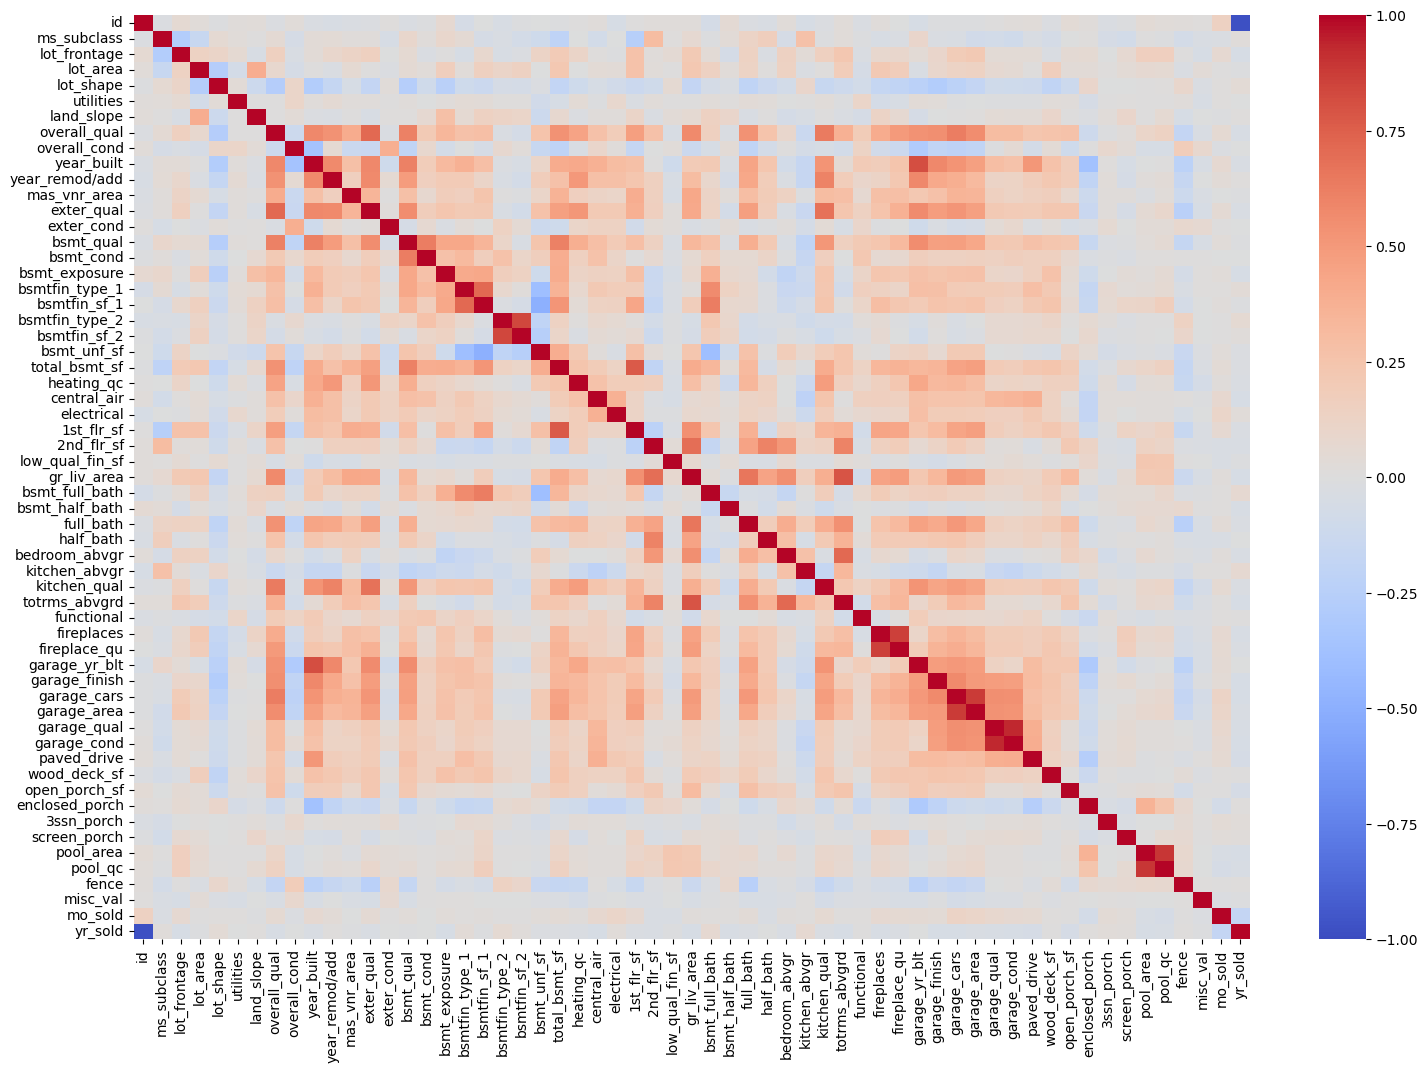

In [47]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1) ;

In [48]:
df.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish',

### Converting other categorical data cols into One-Hot Encoded cols

In [49]:
df.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish',

In [50]:
# getdummies
dummy_cols_dropfirst = [
'ms_subclass',
'ms_zoning',
'street',
'land_contour',
'lot_config',
'neighborhood',
'condition_1',
'condition_2',
'bldg_type',
'house_style',
'roof_style',

'foundation',

'mo_sold',
'yr_sold',
]

dummy_cols_no_dropfirst = [
'alley',        # Has NaN's, don't drop first
'garage_type',  # Has NaN's, don't drop first

]

dummy_ignore_cols = [
    #temporarily removing--- NOT the problem
    
    
    #from no_first
'roof_matl',  # causes problems
'sale_type',  # causes problems
'heating',
'exterior_1st',
'exterior_2nd',

    #from no_dropfirst
'mas_vnr_type', # Has NaN's, don't drop first
'misc_feature', # Has NaN's, don't drop first
]

# df3 = pd.get_dummies(df, columns = dummy_cols_no_dropfirst, drop_first=False)
# df = df3

# df2 = pd.get_dummies(df, columns = dummy_cols_dropfirst, drop_first=True)
# df3 = pd.get_dummies(df2, columns = dummy_cols_no_dropfirst, drop_first=False)
# df = df3


In [51]:
# Create X and y.
if run_type==1:
    excluded_cols = ['id','saleprice'] + dummy_ignore_cols #+ dummy_cols_dropfirst + dummy_cols_no_dropfirst
else:
    excluded_cols = ['id'] + dummy_ignore_cols
    
Xnodummies = df.drop(columns= dummy_cols_dropfirst + dummy_cols_no_dropfirst + dummy_ignore_cols)
    
Xdropf = df[dummy_cols_dropfirst]
Xnodropf = df[dummy_cols_no_dropfirst]

In [52]:
Xdropf.head()

,ms_subclass,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,foundation,mo_sold,yr_sold
0,190,RM,Pave,Lvl,Inside,OldTown,Norm,Norm,2fmCon,2Story,Gable,Stone,4,2006
1,90,RL,Pave,Lvl,Inside,Sawyer,Norm,Norm,Duplex,1Story,Gable,CBlock,8,2006
2,60,RL,Pave,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,PConc,9,2006
3,30,RM,Pave,Lvl,Inside,OldTown,Norm,Norm,1Fam,1Story,Gable,CBlock,7,2007
4,20,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CBlock,7,2009


In [53]:
pd.DataFrame(Xdropf).iloc[:,11].head()

0     Stone
1    CBlock
2     PConc
3    CBlock
4    CBlock
Name: foundation, dtype: object

In [54]:
#Reference: 305-lesson-feature-engineering

# if run_type == 1:
#     oh_ydf = OneHotEncoder(drop='first', sparse=False)
#     oh_ndf = OneHotEncoder(drop=None, sparse=False)

#     X_oh_ydf = pd.DataFrame(oh_ydf.fit_transform(Xdropf))
#     X_oh_ndf = pd.DataFrame(oh_ndf.fit_transform(Xnodropf))
# else:
#     X_oh_ydf = pd.DataFrame(oh_ydf.transform(Xdropf))
#     X_oh_ndf = pd.DataFrame(oh_ndf.transform(Xnodropf))   


oh_ydf = OneHotEncoder(drop=None, sparse=False)    
# oh_ydf = OneHotEncoder(drop='first', sparse=False)
oh_ndf = OneHotEncoder(drop=None, sparse=False)

X_oh_ydf = pd.DataFrame(oh_ydf.fit_transform(Xdropf))
X_oh_ndf = pd.DataFrame(oh_ndf.fit_transform(Xnodropf))
    
    
oh_ydf.get_feature_names_out(Xdropf.columns)   # this is how you get the names

X_oh_ydf.shape

(878, 112)

In [55]:
X_oh_ydf.columns = oh_ydf.get_feature_names_out(Xdropf.columns)
X_oh_ndf.columns = oh_ndf.get_feature_names_out(Xnodropf.columns)

In [56]:
X_oh_ndf.shape

(878, 10)

In [57]:
Xnodummies.shape

(878, 56)

In [58]:
type(X_oh_ydf)

pandas.core.frame.DataFrame

In [59]:
X_oh = pd.concat([Xnodummies, X_oh_ydf, X_oh_ndf], axis = 1)

X_oh.shape


# Kate Skibo's code:
# df = pd.concat([df, pd.get_dummies(df.select_dtypes('object'), dummy_na=False)], axis = 1)
# df = pd.concat([df, pd.get_dummies('ms_subclass', dummy_na=False)], axis = 1)

(878, 178)

In [60]:
# # Reference: https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string
# # spike_cols = [col for col in df.columns if 'spike' in col]

ms_subclass_cols = [col for col in X_oh.columns if 'ms_subclass' in col]
ms_zoning_cols = [col for col in X_oh.columns if 'ms_zoning' in col]
land_contour_cols = [col for col in X_oh.columns if 'land_contour' in col]
lot_config_cols = [col for col in X_oh.columns if 'lot_config' in col]
neighborhood_cols = [col for col in X_oh.columns if 'neighborhood' in col]
condition_1_cols = [col for col in X_oh.columns if 'condition_1' in col]
condition_2_cols = [col for col in X_oh.columns if 'condition_2' in col]
bldg_type_cols = [col for col in X_oh.columns if 'bldg_type' in col]
house_style_cols = [col for col in X_oh.columns if 'house_style' in col]
roof_style_cols = [col for col in X_oh.columns if 'roof_style' in col]
roof_matl_cols = [col for col in X_oh.columns if 'roof_matl' in col]
exterior_1st_cols = [col for col in X_oh.columns if 'exterior_1st' in col]
exterior_2nd_cols = [col for col in X_oh.columns if 'foundation' in col]
heating_cols = [col for col in X_oh.columns if 'heating' in col]   #will pick up non-dummy col(s) also
mo_sold_cols = [col for col in X_oh.columns if 'mo_sold' in col]
yr_sold_cols = [col for col in X_oh.columns if 'yr_sold' in col]
sale_type_cols = [col for col in X_oh.columns if 'sale_type' in col]
alley_cols = [col for col in X_oh.columns if 'alley' in col]
mas_vnr_type_cols = [col for col in X_oh.columns if 'mas_vnr_type' in col]
garage_type_cols = [col for col in X_oh.columns if 'garage_type' in col]
misc_feature_cols = [col for col in X_oh.columns if 'misc_feature' in col]

In [61]:
roof_matl_cols

[]

In [62]:
Xnodummies.columns

Index(['id', 'lot_frontage', 'lot_area', 'lot_shape', 'utilities',
       'land_slope', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1',
       'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd',
       'functional', 'fireplaces', 'fireplace_qu', 'garage_yr_blt',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc',
       'fence', 'misc_val'],
      dtype='object')

### Write intermediate cleaned dataset

In [63]:
if run_type == 1:
    X_oh.to_csv(f'./datasets/ames_cleaned_{run_id_number}.csv',index=False)
else:
    X_oh.to_csv(f'./datasets/test_cleaned_{run_id_number}.csv',index=False)

In [64]:
#troubleshooting datadumps---- remove for final
if run_type == 1:
    X_oh_ydf.to_csv(f'./datasets/troubleshooting_Train_X_oh_ydf_{run_id_number}.csv',index=False)
    X_oh_ndf.to_csv(f'./datasets/troubleshooting_Train_X_oh_ndf_{run_id_number}.csv',index=False)   
else:
    X_oh_ydf.to_csv(f'./datasets/troubleshooting_Contest_X_oh_ydf_{run_id_number}.csv',index=False)
    X_oh_ndf.to_csv(f'./datasets/troubleshooting_Contest_X_oh_ndf_{run_id_number}.csv',index=False) 


### Fitting a model

In [65]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [66]:
# df.isna().sum().sort_values(ascending=False).head(10)

In [67]:
# df.columns

In [68]:
# run_id_number =3   #COMMENT OUT LATER!!!!

In [69]:
train = pd.read_csv(f'./datasets/ames_cleaned_{run_id_number}.csv')

In [70]:
contest = pd.read_csv(f'./datasets/test_cleaned_{run_id_number}.csv')

In [71]:
train.shape

(2051, 188)

In [72]:
#troubleshooting datadumps---- remove for final

X_train_oh_ydf = pd.read_csv(f'./datasets/troubleshooting_Train_X_oh_ydf_{run_id_number}.csv')
X_train_oh_ndf = pd.read_csv(f'./datasets/troubleshooting_Train_X_oh_ndf_{run_id_number}.csv')

X_contest_oh_ydf = pd.read_csv(f'./datasets/troubleshooting_Contest_X_oh_ydf_{run_id_number}.csv')
X_contest_oh_ndf = pd.read_csv(f'./datasets/troubleshooting_Contest_X_oh_ndf_{run_id_number}.csv')

In [73]:
# Method from Kate Skibo via Katie Sylvia
# X = cdf.drop(columns=['id']).drop(columns=(list(set(cdf) - set(ctest))))

train_trimmed = train.drop(columns=(list(set(train) - set(contest))))
train_trimmed['saleprice'] = train['saleprice']

In [74]:
# Used for an intermediate, unsuccessful model. Didn't end up useful

top_cols_only = ['exter_qual', 
                 'kitchen_qual', 
                 'land_slope', 
                 'full_bath', 
                 'bsmt_qual', 
                 'overall_qual', 
                 'totrms_abvgrd', 
                 'half_bath', 
                 'fireplaces', 
                 'garage_cars', 
                 'bsmt_full_bath', 
                 'functional', 
                 'heating_qc', 
                 'overall_cond', 
                 'paved_drive', 
                 'bsmt_exposure', 
                 'bsmtfin_type_1', 
                 'fireplace_qu', 
                 'bsmtfin_type_2', 
                 'bsmt_half_bath', 
                 'pool_area', 
                 'fence', 
                 'lot_frontage', 
                ]

In [75]:
# # Create X and y.

# #Re-defined (identical as before/above) in case code is split into separate files
# if run_type==1:
#     excluded_cols = ['id','saleprice'] #+ dummy_ignore_cols  #dummy ignore already taken out when writing to the file that gets read in for 'Fitting a Model' section
# else:
#     excluded_cols = ['id'] #+ dummy_ignore_cols


# X = train.drop(columns=excluded_cols)
# y = train['saleprice']

# # X_contest = contest[top_cols_only]    # didn't end up useful
# X_contest = contest.drop(columns=excluded_cols)

In [76]:
# Create X and y.

X = train_trimmed.drop(columns=['id','saleprice'])
y = train['saleprice']

# X_contest = contest[top_cols_only]    # didn't end up useful
X_contest = contest.drop(columns=['id'])
# X_contest = contest.drop(columns='id')

In [77]:
# X.columns
X.shape

(2051, 177)

In [78]:
# X_contest.columns
X_contest.shape

(878, 177)

In [79]:
list(set(X) - set(X_contest))

[]

In [80]:
# Reference: https://stackoverflow.com/questions/68152902/extracting-only-object-type-columns-in-a-separate-list-from-a-data-frame-in-pand
X_contest.select_dtypes(include='object')
# col_list = df_flights.select_dtypes(include=['object']).columns.to_list()
X_contest.select_dtypes(include=['object']).columns.to_list()

[]

#### Basic Linear Model

In [81]:
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, cv=10))

0.8416798794432493

In [82]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(
    X, y, 
    test_size=.7, 
    random_state=42
)

lr.fit(Xl_train, yl_train)
lr.score(Xl_train, yl_train)

0.9184054678924463

In [83]:
lr.score(Xl_test, yl_test)

0.7987678811336867

In [84]:
# y_predict_linear = lr.predict(X_contest)
y_predict_linear = lr.predict(X_contest)

In [85]:
# Kate Skibbo's code: set(zip(X.columns, lr.coef_)) 
# set(zip(Z_test.columns,lasso_cv.coef_))  #mine. didn't work

# list(zip(X.columns, lr.coef_))
# pd.DataFrame(list(zip(X.columns, lr.coef_)))
pd.DataFrame(list(zip(X.columns, lr.coef_))).sort_values(by=[1], ascending=False).head()

,0,1
68,ms_subclass_180,79569.436688
59,ms_subclass_50,75594.945363
60,ms_subclass_60,75537.612274
62,ms_subclass_75,69477.854705
57,ms_subclass_40,68113.943491


#### Poly-fit Model

In [86]:
# Reference: 403-lesson-regularization

# Instantiate our PolynomialFeatures object to create all two-way terms.
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit, y, 
    test_size=.7, 
    random_state=42,
    # stratify = y     #breaks things: ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)


ols = LinearRegression()
ols.fit(Z_train, y_train)

ols.score(Z_train, y_train)

1.0

In [87]:
ols.score(Z_test, y_test)

0.8770852527754999

In [88]:
Z_train.shape

(615, 955860)

In [89]:
Z_test.shape

(1436, 955860)

In [90]:
X_test.shape

(1436, 955860)

In [91]:
X_contest_overfit = poly.fit_transform(X_contest)
Z_contest = sc.transform(X_contest_overfit)

In [92]:
# pd.DataFrame(X_contest_overfit).head()
pd.DataFrame(X_contest).head()

,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,alley_Grvl,alley_Pave,alley_nan,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_nan
0,69.0,9142,3,4,0,6,8,1910,1950,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,9662,2,4,0,5,4,1977,1977,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,58.0,17104,2,4,0,7,5,2006,2006,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,60.0,8520,3,4,0,5,6,1923,2006,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,9500,2,4,0,6,5,1963,1963,247.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [93]:
y_predict_overfit = ols.predict(Z_contest)

In [94]:
Xpoly = pd.DataFrame(contest['id'])
Xpoly['SalePrice'] = y_predict_overfit
Xpoly.columns = ['Id','SalePrice']
Xpoly.set_index('Id', inplace = True)
Xpoly.shape
Xpoly.to_csv(f'./output/predictions_{run_id_number}_poly.csv')

#### Ridge model

In [95]:
# Reference: 403-lesson-regularization

from sklearn.linear_model import Ridge, RidgeCV


# Z_train, Z_test, y_train, y_test are re-used from Poly-fit section above

# Instantiate.
# ridge = Ridge(alpha=100000)
ridge = Ridge(alpha=278255)

# Fit.
ridge.fit(Z_train, y_train)

Ridge(alpha=278255)

In [96]:
ridge.score(Z_train, y_train)


0.9629146806332427

In [97]:
ridge.score(Z_test, y_test)

0.8821152546918751

In [98]:
r_alphas = np.logspace(5, 6, 10)    # checks 1000 different alphas on each of the 5 k-folds

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=10)   #default alphas are .1, 1.0, 10

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([ 100000.        ,  129154.96650149,  166810.05372001,
        215443.46900319,  278255.94022071,  359381.36638046,
        464158.88336128,  599484.25031894,  774263.68268113,
       1000000.        ]),
        cv=10, scoring='r2')

In [99]:
ridge_cv.alpha_

278255.94022071257

In [100]:
ridge_cv.score(Z_train, y_train)

0.9629145863868822

In [101]:
ridge_cv.score(Z_test, y_test)

0.8821152151358432

In [102]:
y_predict_ridge = ridge_cv.predict(Z_contest)

In [103]:
# plt.scatter(df.year_built, df.saleprice) ;
# plt.xlabel('year_built')
# plt.ylabel('saleprice') ;
# # plt.scatter(pd.DataFrame(X_test).loc[columns==7], ridge_cv.predict(Z_test), s=5, alpha=.5) ;   #doesn't work

In [104]:
Xridge = pd.DataFrame(contest['id'])
Xridge['SalePrice'] = y_predict_ridge
Xridge.columns = ['Id','SalePrice']
Xridge.set_index('Id', inplace = True)
Xridge.shape
Xridge.to_csv(f'./output/predictions_{run_id_number}_ridge.csv')

#### LASSO model

In [105]:
# Reference: 403-lesson-regularization

from sklearn.linear_model import Lasso, LassoCV

# Set up a list of Lasso alphas to check.
# l_alphas= np.logspace(-3, -1, 100)
l_alphas= np.logspace(3.05, 3.15, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5)


In [106]:
# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.952e+08, tolerance: 3.127e+08
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.780e+08, tolerance: 3.524e+08
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([1122.0184543 , 1124.63113082, 1127.24989109, 1129.87474928,
       1132.50571958, 1135.14281623, 1137.78605348, 1140.43544566,
       1143.09100707, 1145.75275209, 1148.42069512, 1151.09485059,
       1153.77523297, 1156.46185675, 1159.15473647, 1161.85388669,
       1164.55932203, 1167.2710571 , 1169.98910659, 1172.71348519,
       1175.44420765, 1178.18128873, 1180.92474324, 1183.674...
       1326.56114522, 1329.65010971, 1332.746267  , 1335.84963385,
       1338.96022705, 1342.07806343, 1345.20315984, 1348.3355332 ,
       1351.47520044, 1354.62217856, 1357.77648458, 1360.93813556,
       1364.1071486 , 1367.28354084, 1370.46732948, 1373.65853173,
       1376.85716485, 1380.06324616, 1383.27679298, 1386.49782271,
       1389.72635277, 1392.96240063, 1396.20598378, 1399.45711978,
       1402.71582622, 1405.98212072, 1409.25602095, 1412.53754462]),
        cv=5)

In [107]:
# Here is the optimal value of alpha
lasso_cv.alpha_

1329.6501097055684

In [108]:
lasso_cv.score(Z_train, y_train)

0.9793732895748158

In [109]:
lasso_cv.score(Z_test, y_test)

0.9037590886590048

In [110]:
y_predict_lasso = lasso_cv.predict(Z_contest)

In [111]:
Xf = pd.DataFrame(contest['id'])
Xf['SalePrice'] = y_predict_lasso
Xf.columns = ['Id','SalePrice']
Xf.set_index('Id', inplace = True)
Xf.shape

(878, 1)

In [112]:
Xf.to_csv(f'./output/predictions_{run_id_number}_lasso.csv')

In [113]:
# lasso_cv.coef_
pd.DataFrame(list(zip(pd.DataFrame(X_test).columns, lasso_cv.coef_))).sort_values(by=[1], ascending=False).head(6)

,0,1
93788,93788,5786.106282
96940,96940,5328.531647
92972,92972,5243.503826
308641,308641,4078.438986
311834,311834,3898.870320
98499,98499,3275.160347


In [114]:
# poly.get_feature_names(X.columns)
pd.DataFrame(list(zip(poly.get_feature_names_out(X.columns), lasso_cv.coef_))).sort_values(by=[1], ascending=False)

,0,1
93788,overall_qual exter_qual bsmt_qual,5786.106282
96940,overall_qual full_bath kitchen_qual,5328.531647
92972,overall_qual^2 garage_cars,5243.503826
308641,total_bsmt_sf neighborhood_StoneBr bldg_type_1Fam,4078.438986
311834,heating_qc gr_liv_area functional,3898.870320
...,...,...
490082,fireplaces open_porch_sf neighborhood_Edwards,-899.948678
259977,bsmtfin_sf_1 mo_sold_1 yr_sold_2009,-1170.813491
152653,mas_vnr_area bsmtfin_sf_1 neighborhood_Edwards,-3049.396129
301776,total_bsmt_sf garage_area neighborhood_Edwards,-4979.105320


In [115]:
# pd.DataFrame(list(zip(poly.get_feature_names(X.columns), lasso_cv.coef_))).loc[[0].str.isna()]   #doesn't work

In [116]:
# y_predict_lr = lr.predict(X_contest)

In [117]:
lasso_cv.coef_

array([ 0.,  0.,  0., ...,  0.,  0., -0.])